# Titanic - Machine Learning from Disaster
Start here! Predict survival on the Titanic and get familiar with ML basics

In [1]:
import pandas as pd

Here we read the train.csv file in which the detailed data of Titanic Survival is Recorded

In [2]:
data=pd.read_csv("train.csv")

In [3]:
data.shape

(891, 12)

So ,there are details of 891 people.
Below command shows us first 5 row details

In [4]:
data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


## PREPROCESSING DATA

In [5]:
data=data.drop(["Name","Ticket","Cabin"],axis=1)

In [6]:
data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,3,male,22.0,1,0,7.2500,S,0
1,2,1,female,38.0,1,0,71.2833,C,1
2,3,3,female,26.0,0,0,7.9250,S,1
3,4,1,female,35.0,1,0,53.1000,S,1
4,5,3,male,35.0,0,0,8.0500,S,0


In [7]:
data.shape

(891, 9)

#### Label encoding

In [8]:
from sklearn.preprocessing import LabelEncoder 

In [9]:
le=LabelEncoder()

In [10]:
data.iloc[:,2]=le.fit_transform(data.iloc[:,2])

In [11]:
data.iloc[:,7]=le.fit_transform(data.iloc[:,7])

In [12]:
data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,3,1,22.0,1,0,7.2500,2,0
1,2,1,0,38.0,1,0,71.2833,0,1
2,3,3,0,26.0,0,0,7.9250,2,1
3,4,1,0,35.0,1,0,53.1000,2,1
4,5,3,1,35.0,0,0,8.0500,2,0


#### Imputation

In [13]:
from sklearn.impute import SimpleImputer
import numpy as np

In [14]:
si=SimpleImputer(strategy="mean",missing_values=np.NaN)

In [15]:
data.iloc[:,3:4]=si.fit_transform(data.iloc[:,3:4])

In [16]:
data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,3,1,22.0,1,0,7.2500,2,0
1,2,1,0,38.0,1,0,71.2833,0,1
2,3,3,0,26.0,0,0,7.9250,2,1
3,4,1,0,35.0,1,0,53.1000,2,1
4,5,3,1,35.0,0,0,8.0500,2,0


In [17]:
data.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
Survived       0
dtype: int64

In [18]:
data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,3,1,22.0,1,0,7.2500,2,0
1,2,1,0,38.0,1,0,71.2833,0,1
2,3,3,0,26.0,0,0,7.9250,2,1
3,4,1,0,35.0,1,0,53.1000,2,1
4,5,3,1,35.0,0,0,8.0500,2,0


#### Here  'X' is Independent variable, and 'y' is Dependent Variable. There can be only one dependent variable

In [19]:
X=data.iloc[:,[0,1,2,3,4,5,6,8]]

In [20]:
y=data.iloc[:,-1]

In [21]:
X

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
0,1,3,1,22.000000,1,0,7.2500,0
1,2,1,0,38.000000,1,0,71.2833,1
2,3,3,0,26.000000,0,0,7.9250,1
3,4,1,0,35.000000,1,0,53.1000,1
4,5,3,1,35.000000,0,0,8.0500,0
...,...,...,...,...,...,...,...,...
886,887,2,1,27.000000,0,0,13.0000,0
887,888,1,0,19.000000,0,0,30.0000,1
888,889,3,0,29.699118,1,2,23.4500,0
889,890,1,1,26.000000,0,0,30.0000,1


In [22]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

### Training and Splitting of data


In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.10)

In [25]:
X_train.head(2)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
815,816,1,1,29.699118,0,0,0.0000,0
877,878,3,1,19.000000,0,0,7.8958,0


In [26]:
X_test.head(2)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
495,496,3,1,29.699118,0,0,14.4583,0
648,649,3,1,29.699118,0,0,7.5500,0


In [27]:
y_train.head(2)

815    0
877    0
Name: Survived, dtype: int64

In [28]:
y_test.head(2)

495    0
648    0
Name: Survived, dtype: int64

In [29]:
print(X_train.shape , X_test.shape , y_train.shape , y_test.shape)

(801, 8) (90, 8) (801,) (90,)


### Scaling using 'scale' method

In [30]:
from sklearn.preprocessing import scale

In [31]:
X_train=scale(X_train)

In [32]:
X_test=scale(X_test)

In [33]:
X_train

array([[ 1.44793149, -1.60703355,  0.73510857, ..., -0.4680658 ,
        -0.63579689, -0.78002162],
       [ 1.68899694,  0.80803938,  0.73510857, ..., -0.4680658 ,
        -0.47501012, -0.78002162],
       [-0.97049937, -0.39949708,  0.73510857, ...,  0.765226  ,
        -0.10634377,  1.28201574],
       ...,
       [ 0.72473512,  0.80803938,  0.73510857, ..., -0.4680658 ,
        -0.47831921, -0.78002162],
       [ 0.45256445,  0.80803938, -1.36034327, ..., -0.4680658 ,
        -0.28147057,  1.28201574],
       [ 0.93858351, -0.39949708,  0.73510857, ...,  0.765226  ,
         0.15838279, -0.78002162]])

In [34]:
X_test

array([[ 0.11185496,  1.01600102,  0.76088591,  0.09010682, -0.54959128,
        -0.52827054, -0.49417189, -0.87447463],
       [ 0.70861699,  1.01600102,  0.76088591,  0.09010682, -0.54959128,
        -0.52827054, -0.6230693 , -0.87447463],
       [-0.73453302,  1.01600102,  0.76088591, -1.70200602,  3.48822219,
         0.79240582, -0.22051562, -0.87447463],
       [-1.69793317, -1.27000127, -1.31425748,  0.09010682,  0.45986209,
        -0.52827054,  1.96989511,  1.14354375],
       [-0.82424235,  1.01600102, -1.31425748,  0.03491095, -0.54959128,
         2.11308218, -0.47947845,  1.14354375],
       [-0.65652491, -1.27000127,  0.76088591,  0.09010682, -0.54959128,
        -0.52827054, -0.1948604 ,  1.14354375],
       [ 0.55650118, -1.27000127, -1.31425748,  0.90336943, -0.54959128,
        -0.52827054,  2.09941571,  1.14354375],
       [-0.5785168 , -1.27000127, -1.31425748,  0.19281249, -0.54959128,
         2.11308218,  2.31219915,  1.14354375],
       [ 0.0689505 , -1.27000127

##  LOGISTIC REGRESSION

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
lr=LogisticRegression()

In [37]:
y_train

815    0
877    0
193    1
523    1
634    0
      ..
835    1
192    1
629    0
559    1
684    0
Name: Survived, Length: 801, dtype: int64

In [38]:
lr.fit(X_train,y_train)

LogisticRegression()

Below we are passing the X_test data for prediction , whose values is known to us in y_test. But the Prediction of the machine for the passed X_test data is stored in y_pred .

In [39]:
y_pred=lr.predict(X_test)

### Now we create a data frame for the Predicted values by the Machine and the actual values of it.

In [40]:
df=pd.DataFrame({"Actual":y_test,"Predicted":y_pred})

In [41]:
df

,Actual,Predicted
495,0,0
648,0,0
278,0,0
31,1,1
255,1,1
...,...,...
627,1,1
380,1,1
483,1,1
516,1,1


### Below we check the accuracy of the predictions

In [42]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix

In [97]:
print(confusion_matrix(y_test,y_pred))

[[51  0]
 [ 0 39]]


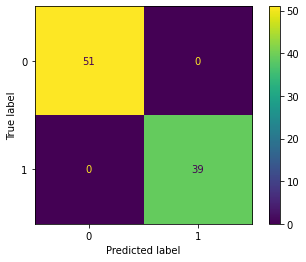

In [100]:
plot_confusion_matrix(lr,X_test,y_test)

In [44]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        51
           1       1.00      1.00      1.00        39

    accuracy                           1.00        90
   macro avg       1.00      1.00      1.00        90
weighted avg       1.00      1.00      1.00        90



In [45]:
accuracy_score(y_test,y_pred)*100

100.0

## Therefore machine is now capable of predicting the survival on titanic .

### 

### Now we are checking the machine predictions on the 'test.csv' data. Its actual answer is saved in 'gender_submission.csv' file.
We have already trained machine to predictions of survival on Titanic.

# 

We have to preprocess the test.csv file

In [46]:
test_data=pd.read_csv("test.csv")

In [47]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [48]:
test_data=test_data.drop(["Name","Ticket","Cabin"],axis=1)

##### Here le is the object of LabelEncoder class we had created

In [49]:
test_data.iloc[:,2]=le.fit_transform(test_data.iloc[:,2])

In [50]:
test_data.iloc[:,7]=le.fit_transform(test_data.iloc[:,7])

In [51]:
test_data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,1,34.5,0,0,7.8292,1
1,893,3,0,47.0,1,0,7.0000,2
2,894,2,1,62.0,0,0,9.6875,1
3,895,3,1,27.0,0,0,8.6625,2
4,896,3,0,22.0,1,1,12.2875,2


In [52]:
test_data.isnull().sum()

PassengerId     0
Pclass          0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
dtype: int64

#### Imputation 

In [53]:
from sklearn.impute import SimpleImputer
import numpy as np

In [54]:
si=SimpleImputer(strategy="mean",missing_values=np.NaN)

In [55]:
test_data.iloc[:,3:4]=si.fit_transform(test_data.iloc[:,3:4])
test_data.iloc[:,6:7]=si.fit_transform(test_data.iloc[:,6:7])

In [56]:
test_data.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [57]:
test_data.shape

(418, 8)

In [58]:
test_data=scale(test_data)

In [59]:
test_data

array([[-1.72791209,  0.87348191,  0.75592895, ..., -0.4002477 ,
        -0.49840706, -0.47091535],
       [-1.71962474,  0.87348191, -1.32287566, ..., -0.4002477 ,
        -0.51327429,  0.70076689],
       [-1.71133739, -0.31581919,  0.75592895, ..., -0.4002477 ,
        -0.46508846, -0.47091535],
       ...,
       [ 1.71133739,  0.87348191,  0.75592895, ..., -0.4002477 ,
        -0.50879189,  0.70076689],
       [ 1.71962474,  0.87348191,  0.75592895, ..., -0.4002477 ,
        -0.4944482 ,  0.70076689],
       [ 1.72791209,  0.87348191,  0.75592895, ...,  0.61989583,
        -0.23790598, -1.64259759]])

# Prediction
Prediction of machine on test_data is stored in pred .

In [60]:
pred=lr.predict(test_data)

In [61]:
pred

array([0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,

#### As we know 'gender_submission.csv' stores answer for 'test.csv' , we have to access that file in order to check how much correct predictions are made. 

In [62]:
result=pd.read_csv("gender_submission.csv")

In [63]:
result=result.drop("PassengerId",axis=1)

In [64]:
result

,Survived
0,0
1,1
2,0
3,0
4,1
...,...
413,0
414,1
415,0
416,0


In [85]:
result.shape

(418,)

The result must be a 1D array.

In [86]:
result=np.array(result)

In [87]:
result

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [88]:
result=result.flatten()             #for converting 2D array to 1D array flatten() is used

In [89]:
result

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [90]:
df=pd.DataFrame({"Prediction":pred,"Actual":result})

In [91]:
df

,Prediction,Actual
0,0,0
1,1,1
2,0,0
3,1,0
4,1,1
...,...,...
413,1,0
414,0,1
415,1,0
416,1,0


In [92]:
print(classification_report(pred,result))

              precision    recall  f1-score   support

           0       0.32      0.57      0.41       148
           1       0.58      0.33      0.42       270

    accuracy                           0.41       418
   macro avg       0.45      0.45      0.41       418
weighted avg       0.49      0.41      0.41       418



In [93]:
print(confusion_matrix(pred,result))

[[ 84  64]
 [182  88]]


In [95]:
accuracy_score(pred,ans)*100

NameError: name 'ans' is not defined

# Therefore, machine is well capable of now predicting survival on Titanic.